In [1]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [2]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
treee = tree.DecisionTreeClassifier()  
treee.fit(x_train, y_train)   #fitting our model
y_pred=treee.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7653631284916201


In [3]:
x_train.head(0)

Empty DataFrame
Columns: [PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare]
Index: []

In [6]:
#DT visualization
import sys
!{sys.executable} -m pip install graphviz
#!{sys.executable} -m conda install python-graphviz

In [9]:
text_representation = tree.export_text(treee)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  2.50
|   |   |   |--- feature_6 <= 26.12
|   |   |   |   |--- feature_0 <= 48.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  48.00
|   |   |   |   |   |--- feature_3 <= 55.50
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 206.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 195.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  195.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  206.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |--- feature_0 <= 815.00
|   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(150,150))
_ = tree.plot_tree(treee, 
                   feature_names=('PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare'),  
                   class_names='Survived',
                   filled=True)

In [12]:
fig.savefig("decistion_tree.jpg", dpi='figure', quality=95 )

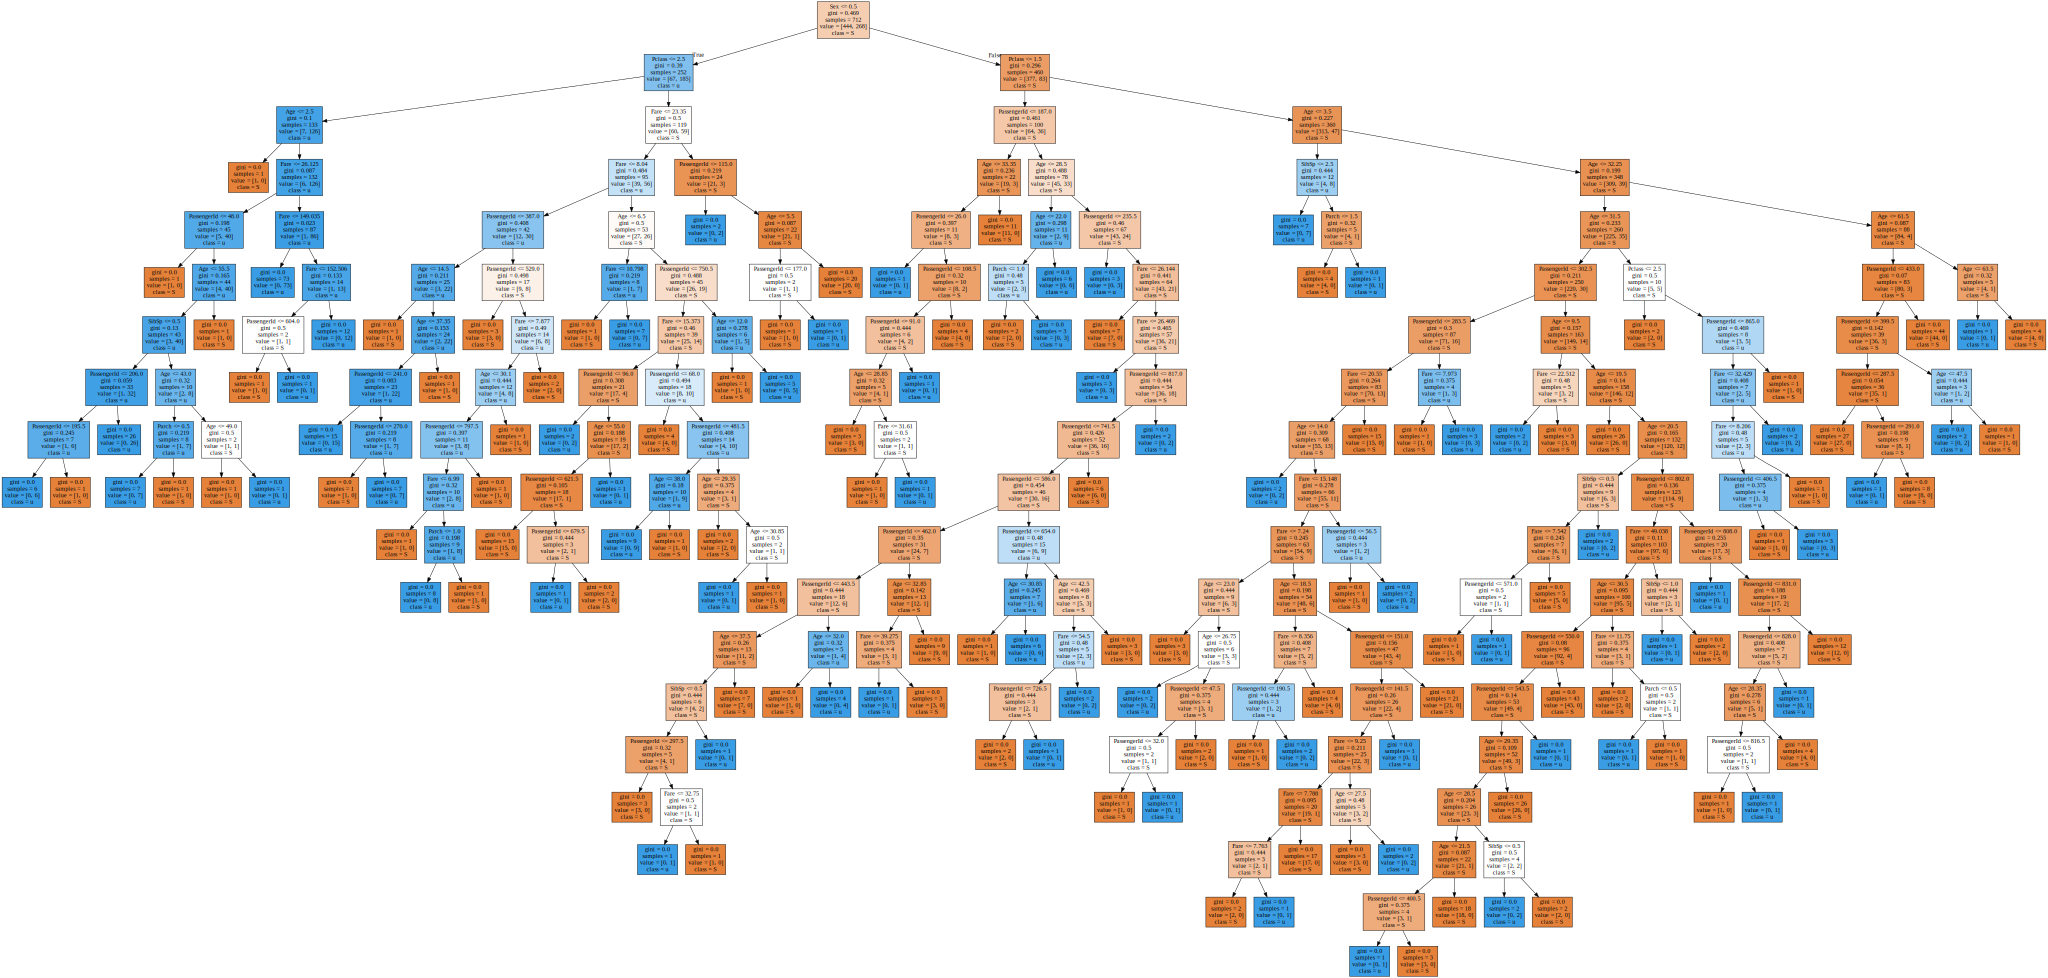

In [19]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(treee, out_file=None, 
                                feature_names=('PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare'),  
                                class_names='Survived',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [21]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

In [14]:
#DT visualization
import sys
!{sys.executable} -m pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-py3-none-any.whl size=52495 sha256=2cf4c98a2b2556aa2a2cc4f74c1e9a48bde997c431b98c2744ac8a69c77cee3a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f9\a4\31\ab1a600f601467c4551c288c34c41beaf8d06fe9d6b8a818f9
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612248 sha256=d020c004b816b138024b26a6a9ac963e0cf71122964afe7439a00dacd10680af
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ea\21\84\970b03913d0d6a96ef51c34c878add0de9e4ecbb7c764ea21f
Successfully built dtreeviz pyspark


In [17]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(treee, x_train, y_train,
                feature_names=('PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare'),  
                class_names='Survived')

viz

In [18]:
viz.save("decision_tree.svg")

In [22]:
dtree = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_leaf_nodes=10, min_samples_leaf=5, max_depth=5)